In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
print("Shape of dataset:", df.shape)
df.info()


Shape of dataset: (2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.duplicated().sum()


np.int64(0)

In [6]:
df.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


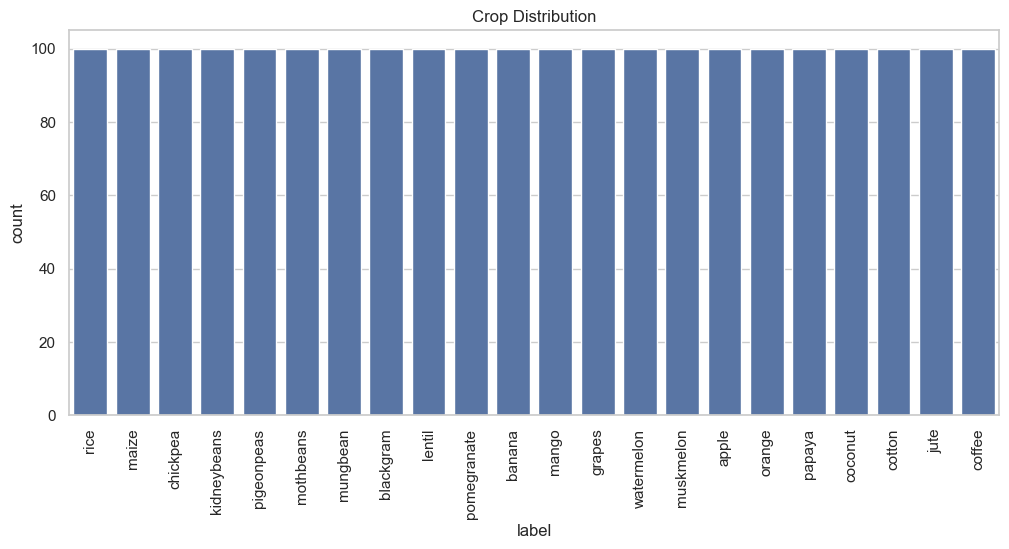

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(x='label', data=df)
plt.xticks(rotation=90)
plt.title("Crop Distribution")
plt.show()


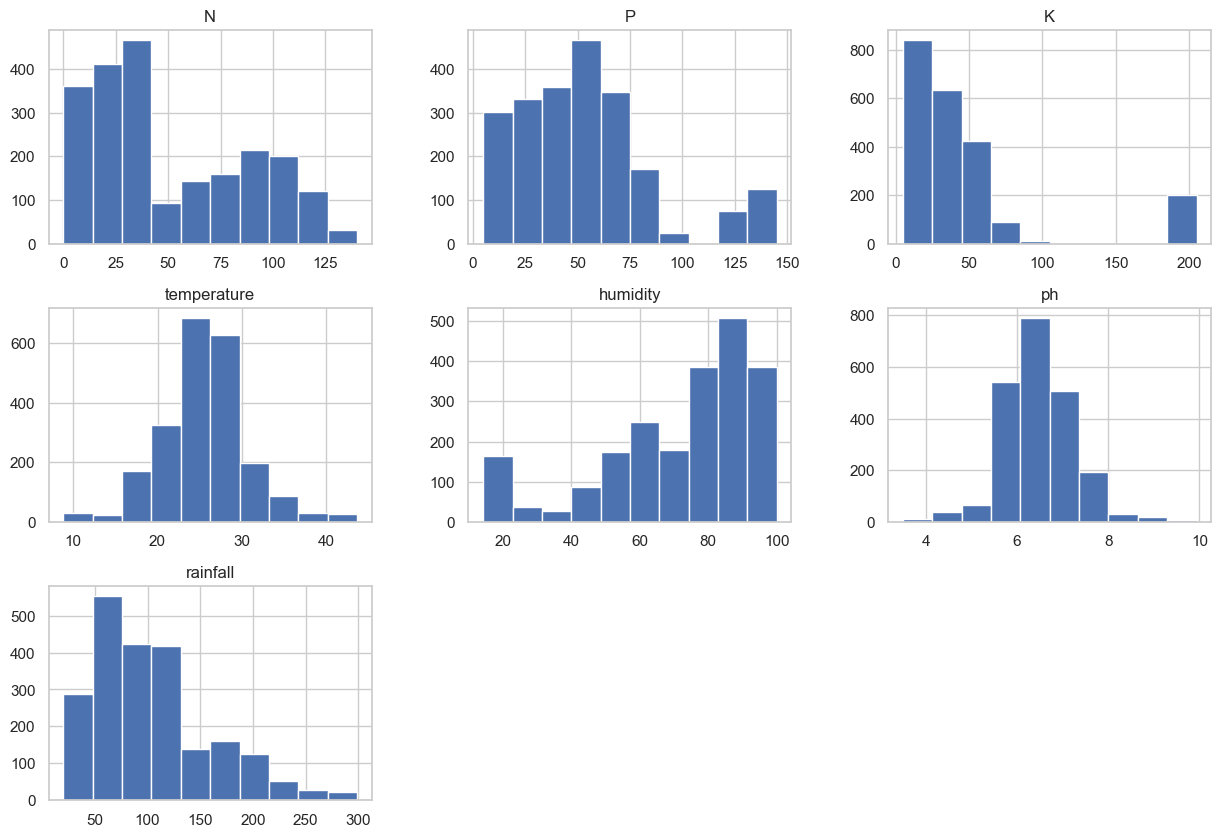

In [8]:
#Feature Distribution (Histogram)
df.hist(figsize=(15,10))
plt.show()


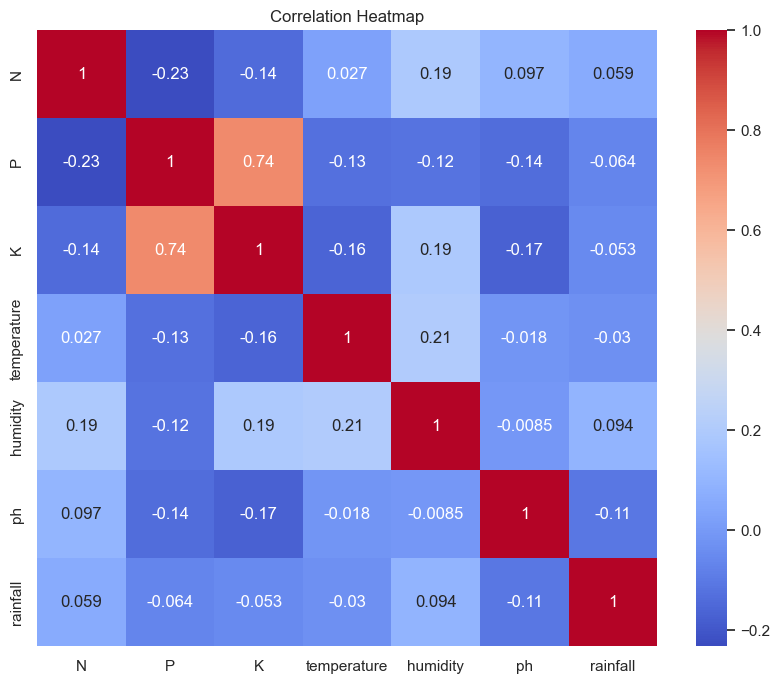

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


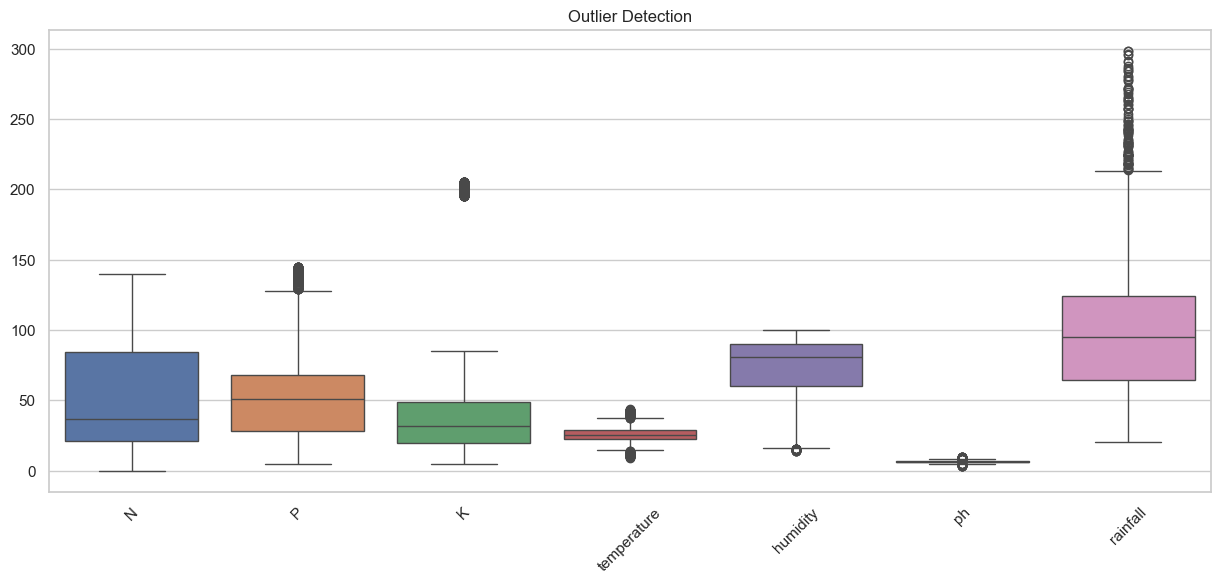

In [10]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df.drop('label', axis=1))
plt.xticks(rotation=45)
plt.title("Outlier Detection")
plt.show()


In [11]:
df['label'].unique()


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
df.groupby('label').mean()


,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


In [13]:
# Drop target column
corr_matrix = df.drop('label', axis=1).corr()

# Display correlation values
corr_matrix


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
X = df.drop('label', axis=1)
y = df['label']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [18]:
y_pred = rf_model.predict(X_test)


In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9954545454545455


In [20]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [23]:
#excellent prediction

In [25]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
6,rainfall,0.219641
4,humidity,0.217058
2,K,0.180813
1,P,0.151342
0,N,0.103356
3,temperature,0.075485
5,ph,0.052305


In [26]:
import joblib

joblib.dump(rf_model, "crop_rf_model.pkl")


['crop_rf_model.pkl']